In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# MNIST ->Sb (NIST)
# 70,000 images (0-9=10 digits)
# 60K training
# 10K Testing 
# 28 x 28

In [ ]:
objects =  tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11493376/11490434 [==============================] - 0s 0us/step


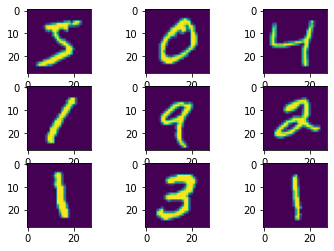

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])


In [ ]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0 

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary() #see the model summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2598 - accuracy: 0.9259
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1134 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0788 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0590 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0283 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0186 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [ ]:
print(model.evaluate(test_images,test_labels))
print(model.predict(test_images))

313/313 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9798
[0.0773095116019249, 0.9797999858856201]
[[6.00789507e-09 5.67512877e-11 1.03140048e-08 ... 9.99999642e-01
  1.16746812e-09 1.57145563e-09]
 [1.12435668e-12 7.96627205e-07 9.99999166e-01 ... 5.15671583e-15
  7.03943737e-10 3.99085165e-17]
 [6.04690342e-09 9.99803483e-01 2.52454756e-05 ... 1.06455009e-04
  5.84494701e-05 2.94591262e-09]
 ...
 [1.39506272e-13 6.53771742e-14 1.42345875e-11 ... 6.11593842e-09
  4.22298889e-08 2.63567949e-06]
 [5.93725720e-12 1.04727418e-17 1.15955973e-15 ... 2.71207803e-14
  3.87433033e-07 7.67850296e-16]
 [1.66821019e-11 1.52338859e-14 4.72548910e-11 ... 7.84927390e-15
  1.24505659e-15 4.81831992e-16]]


7


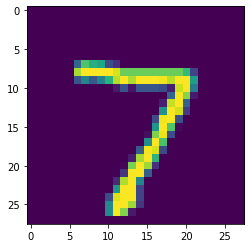

In [ ]:
plt.imshow(test_images[0])
prediction=model.predict(test_images)
print(np.argmax(prediction[0]))

# Major Concepts


**Activation functions**

Immediately after each layer, you generally apply what is known as an activation layer. The purpose of this layer is to introduce nonlinearity to a system that basically has just been computing linear operations during the conv layers (just element wise multiplications and summations)


In the past, nonlinear functions like tanh and sigmoid were used, but researchers found out that ReLU layers work far better because the network is able to train a lot faster (because of the computational efficiency) without making a significant difference to the accuracy. 

It also helps to alleviate the vanishing gradient problem, which is the issue where the lower layers of the network train very slowly because the gradient decreases exponentially through the layers 

The ReLU layer applies the simple function f(x) = max(0, x) to all of the values in the input volume. 

In basic terms, this layer just changes all the negative activations to 0. This layer increases the nonlinear properties of the model and the overall network without affecting the receptive fields of the conv layer. 

![alt text](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)



Remember that what we are using right now is training data. This data has both an image and a label. Let’s say for example that the first training image inputted was a 3. 

The label for the image would be [0 0 0 1 0 0 0 0 0 0]. 

The loss function is a function designed to help you minimize the error between the correct label and the output label. Some examples include:

In [ ]:
# MSE
# Dice
# rmsle

So our goal is to get to a point where the predicted label (output of the CNN) is the same as the training label (This means that our network got its prediction right).

In order to get there, we want to minimize the amount of loss we have. This is just simply an optimization problem in calculus: we want to find out which inputs (starting filter values/weights in our case) most directly contributed to the loss (or error) of the network prediction. (i.e. finding coordinates/weights that minimize our function based on a constraint.)

##### 4. Weight update

This is where we take all the weights of the filters and update them so that they change in the opposite direction of the gradient.

In the above equation, there is a parameter in the optimization function called the learning rate.

Learning rate is a parameter that is chosen by the programmer. A high learning rate means that bigger steps are taken in the weight updates and thus, it may take less time for the model to converge on an optimal set of weights. 

However, a learning rate that is too high could result in jumps that are too large and not precise enough to reach the optimal point, as seen below

![alt text](https://adeshpande3.github.io/assets/HighLR.png)

# Transfer Learning

Transfer learning is the process of taking a pre-trained model (the weights and parameters of a network that has been trained on a large dataset by somebody else) and “fine-tuning” the model with your own dataset. 

The idea is that this pre-trained model will act as a feature extractor. 

You will remove the very last layer of the network and replace it with your own classifier (depending on what your problem space is). 

You then freeze the weights of all the other layers and train the network normally (Freezing the layers means not changing the weights during gradient descent/optimization).

# Improving the Model with more Layers



In [ ]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
from matplotlib import pyplot as plt


mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1 [earlier we used /255.0]
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=50)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2354 - accuracy: 0.9297
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0937 - accuracy: 0.9710
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9800
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9859
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9889
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0265 - accuracy: 0.9910
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0172 - accuracy: 0.9943
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

In [ ]:
model.save('mnist.model') #Save Model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist.model/assets


In [ ]:
new_model = tf.keras.models.load_model('mnist.model') #Load Model using keras

In [ ]:
predictions = new_model.predict(x_test) #predict on Test Data

In [ ]:
print(predictions) #print the Array don't worry we will see some output in next example.

[[1.6799064e-37 5.7405223e-24 2.0119031e-23 ... 1.0000000e+00
  1.2128809e-27 8.1154761e-30]
 [0.0000000e+00 1.1925281e-29 1.0000000e+00 ... 1.8193342e-34
  0.0000000e+00 0.0000000e+00]
 [2.8697362e-34 1.0000000e+00 1.8876486e-19 ... 5.8475151e-17
  2.9486178e-16 3.7449722e-25]
 ...
 [2.0391330e-37 1.5215868e-23 3.6276456e-26 ... 9.6679997e-23
  1.6244834e-18 1.1330602e-18]
 [4.4013627e-38 0.0000000e+00 2.0373108e-32 ... 1.2106319e-31
  1.8223533e-14 0.0000000e+00]
 [0.0000000e+00 3.0691283e-33 0.0000000e+00 ... 0.0000000e+00
  1.7662014e-25 1.3497191e-37]]


Predicted Value: 3


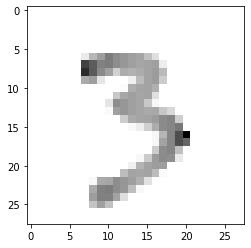

In [ ]:
import numpy as np
n=30 #Change the value of n between (1-9999) as we have 10,000 Images for Testing.
print("Predicted Value:",np.argmax(predictions[n])) 
plt.imshow(x_test[n],cmap=plt.cm.binary)
plt.show()

# Using Callbacks for Stopping when you reach a specific Accuracy

When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks]) #pass the callback here which you defined earlier

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2029 - accuracy: 0.9406
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0820 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - lo